<center><h1 style="font-size:2em;color:#2467C0;font-family:Times New Roman">Tagesaufgaben: Lineare Regression</h1></center>


<div class="alert alert-success" role="alert">
  <h4 class="alert-heading" style="font-size:1.7em">Aufgabe 1: Lineare Regression berechnen  und in einer Graphik darstellen</h4>
  <hr>

   <h4 style="font-family:cursive;">
      Führe mit der Library scikit-learn eine lineare Regression mit dem Wohnungsdatensatz durch (X = "Quadratmeter" ist die erklärende Variable (Prädiktor), y = "Verkaufspreis" ist die vorherzusagende Variable (Kriterium)).<br><br>
       a) Versuche, ein Streudiagramm mit Regressionsgraden aus dem berechneten Regressionsmodell zu erstellen. <br>
       b) Denke an das Splitten in test und train! <br>
       c) Ermittle den Score anhand von Test. <br>
       d) Sage mit Hilfe der berechneten linearen Regression vorher, wie hoch der Preis einer Wohnung ist, die eine Fläche von 60 Quadratmetern hat.
</h4>
</div>


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
wohnungspreise = pd.read_csv(r"wohnungspreise.csv")
wohnungspreise.head()

,Quadratmeter,Verkaufspreis
0,70,351000
1,72,390000
2,91,473000
3,58,282000
4,49,300000


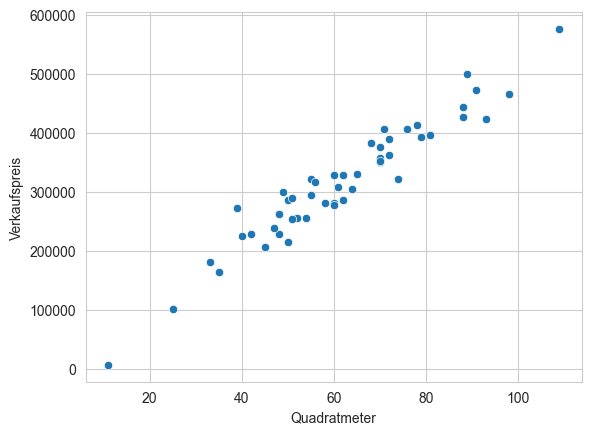

In [3]:
sns.scatterplot(x=wohnungspreise["Quadratmeter"],
                y=wohnungspreise["Verkaufspreis"])
plt.show()

In [4]:
# Daten splitten

X = wohnungspreise[["Quadratmeter"]]
y = wohnungspreise[["Verkaufspreis"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=3)

In [5]:
# Lineare Regression berechnen

model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

In [6]:
print(f"Der Steigungskoeffizient ist: {model.coef_.item():.2f}")
print(f"Der Schnittpunkt mit der Y-Achse ist: {model.intercept_.item():.2f}")

Der Steigungskoeffizient ist: 5065.64
Der Schnittpunkt mit der Y-Achse ist: 2251.17


In [7]:
"""
Die Regressionsgleichung ist also:

Verkaufspreis = 2251 + 5065*Quadratmeter
"""

'\nDie Regressionsgleichung ist also:\n\nVerkaufspreis = 2251 + 5065*Quadratmeter\n'

In [8]:
# Vorhersage von y beim kleinsten und größten x-Wert
min_x = X_train["Quadratmeter"].min()
max_x = X_train["Quadratmeter"].max()

In [9]:
min_max = pd.DataFrame({"Quadratmeter": [min_x, max_x]})
min_max

,Quadratmeter
0,11
1,98


In [10]:
predict = model.predict(min_max)
predict

array([[ 57973.19118331],
       [498683.73227145]])

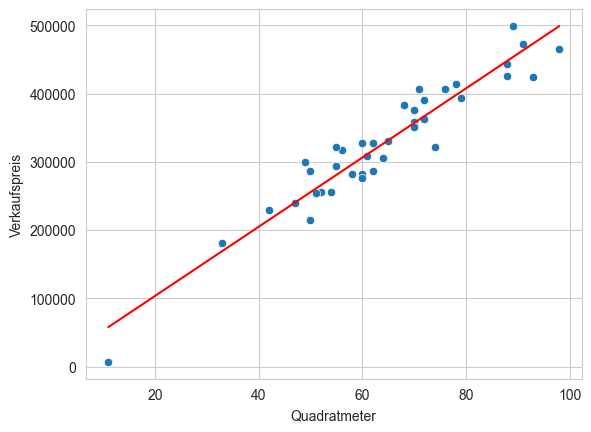

In [11]:
sns.scatterplot(x=X_train["Quadratmeter"], y=y_train["Verkaufspreis"])
plt.plot([min_x, max_x], predict, color="red")
plt.show()

In [12]:
# Wie gut sagt unser Modell unsere Trainingsdaten vorher?
model.score(X_train, y_train)

0.9092467490786244

In [13]:
# Wie gut sagt unser Modell unsere Testdaten vorher?
model.score(X_test, y_test)

0.9401951974146506

In [14]:
# Aufgabe 1b
meine_wohnung = pd.DataFrame({"Quadratmeter": [60]})
meine_wohnung

,Quadratmeter
0,60


In [16]:
preis = model.predict(meine_wohnung).item()
print(
    f"Laut der linearen Regression beträgt der Preis für eine 60 m² Wohnung: {preis:.2f} Euro.")

Laut der linearen Regression beträgt der Preis für eine 60 m² Wohnung: 306189.47 Euro.
